# Stabilität 

Hier müssen wir zwischen zwei verschiedenen Arten der Stabiltät unterscheiden: 

- Stabilität des Systems
- Numerische Stabilität

## Stablität von Systemen

Wie mit dem Fall der Tacoma Narrows Bridge ist ein System nicht notwendigerweise stabil. 

Aber *Was ist Stabilität?*

Vereinfacht ausgedrückt, ein System ist Stabil, wenn es ohne Änderung des äußeren Zustands (Kräfte etc) einen konstanten inneren zustand erreicht. Ein ungedämpft harmonisch schwingendes System ist hier der Grenzfall.

Gewinnt ein System bei konstanter äußerer Erregung stetig an innerer Energie dazu, oder ist in der Lage interne Prozesse selbst ohne Anregung zu verstärken, bezeichnet man das System als instabil, da es zu keiner neuen Ruhelage kommt. Ein Beispiel hierfür ist der Segway, als inverses Pendel fällt dieser samt Fahrer Vorne über, sobald die Regelungstechnik versagt. 

Systeme in welchen der Schwerpunkt oberhalb des Drehpunkts liegt, sind generell instabil. 

*Wenn ein System in endlicher Zeit in eine (neue) Ruhelage zurückkehrt ist es stabil* bzw. *Wenn die innere Energie eines Systems bei konstanter Anregung einen konstanten Zustand erreicht ist es Stabil*

Es existieren noch weitere Analysemethoden, außerhalb der "Logischen Betrachtung" eines Systems, welche eindeutige Auskunft über die Stabilität von Systemen liefern. Die einfachste methode ist vermutlich das Pol-Nullstellen Diagramm. Hierbeit wird die Differenzialgleichung eines Systems mittels Laplace-Transformation (für einfache Systeme: ersetze alle Ableitungen $d/dt$ mit der Laplace Variables $s$) die Pol und Nullstellen ermittelt (Pol: Nullstelle der Eingangsfunktion einer Übertragungsgleichung $G(s) = Y(s) / X(S)$). 

Die genauere Betrachtung sprengt absehbar den Rahmen dieser Veranstalltung, der geneigte Leser mag sich [hier](https://www.youtube.com/playlist?list=PLGFQb_zeS0J8MsefOCy69fGQwW28ZvxDX) weiter über die Grundlagen des Themas zu informieren. (Warning: lots of maths ahead.)

In [5]:
from IPython.display import YouTubeVideo

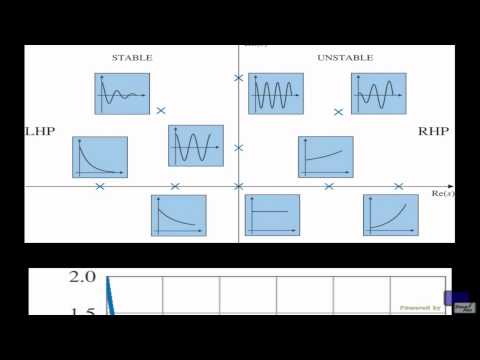

In [6]:
YouTubeVideo("25ZAnzJBvWM", width=650)

Sowie ein etwas verdaulicherer Einstieg in die Materie

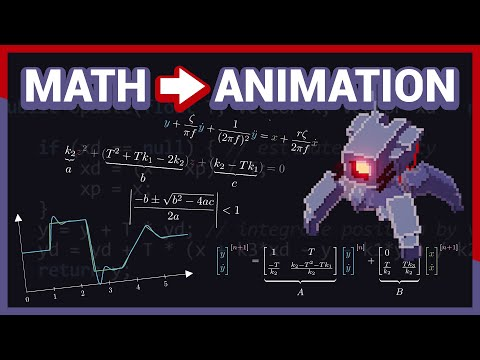

In [7]:
YouTubeVideo("KPoeNZZ6H4s", width=650)

## Numerische Stabilität

Ein *Problem* der physikalischen Simulation, oder genauer: der numerischen Lösungsmethoden ist die Einführung von Fehlern in das System. 

Numerische Lösungen sind immer Annäherungen an die analytische Lösung! 

Aber wie äußert sich der Fehler dieser numerischen Methoden in der Simulation? 

Es kann hier zu verschiedenen Problemen kommen, zunächst die allgemeinen Problemstellungen der Physikalischen Simulation, anschließend einige Probleme wie sie für die Spieleentwicklung relevant sind. 

### Allgemeine Problemstellungen

Zunächst muss betrachtet werden, welche Art von Aufgaben in der Physiksimulation gelößt werden sollen. 

Die erste Problemstellung ist die Integration um von Eingangsgrößen (Kräfte) zu den Ausgangslösungen (Ort) zu gelangen. 

Hier ist schnell zu sehen, wie sich der Fehler äußert. Je nach gewählten Integrationsverfahren, ist das Ergebnis eher größer als der reale Wert, oder geringer. In anderen Worten: die numerische Integration ändert die innere Energie des Systems! 

Die Zweite Problemstellung welche durch numerische Simulation gelößt werden sollen sind Zwangsbedingungen. Diese sind uns bereits unter dem Namen der kinematischen Bindungen begegnet. 

Hier beschreiben wir den geometrischen Zusammenhang zwischen zwei Körpern, beispielsweise den Abstand. 

Der Fehler einer Numerischen Lösungsmethode zeigt sich hier durch Drift der Zwangsbedingung. Simuliert man bspw. ein mathematisches Pendel, kann es je nach gewählter Integrationmethode und Beschreibung des Systems nicht nur dazu kommen, dass dieses grenzstabile System aufschwingt (Änderung der maximalen Auslenkung) sondern der "Faden" des Pendels während der Simulation länger wird. 

Es ist schnell ersichtlich, dass beide Verhalten, einbringen von Energie sowie die Nichteinhaltung der Zwangsbedingungen, nicht gewünscht sind. 

#### Ein Lösungsansatz

Wenn die Zwangsbedingungen bekannt sind, sowie die reale Lage der Körper, kann hieraus ein Fehler $E(t)$ ermittelt werden. Dieser Fehler kann verwendet werden um die Lage der Körper zueinander zu korrigieren. 

Diese Art der Stabilisierung wird allgemein auch als Baumgarte Stabilisierung bezeichnet. (Falls der Leser hier nach weiteren Details sucht: die Baumgarte Stabilisierung wird bei Systemen angewendet die Mittels der Lagrange-Gleichungen das dynamische Verhalten des Systems beschreiben und die Zwangsbedingungen, welche in der so aufgestellten Jakobi Matrix beschrieben werden, stabilisiert. Die hier zum Verständnis notwendige Mathematik ist nicht mehr trivial).

### Aufgabe 1

Wie kann sich das verhalten eines Systems durch die Integration hierdurch ändern? Insbesondere in Hinblick auf die Stabilität? 

### Aufgabe 2

Wie kann das System garantiert stabilitisert werden? Was ist bei der Wahl des Integrationsverfahrens zu beachten? Welche Elemente können hinzugefügt werden um Stabilität zu gewährleisten? 

## Spielesimulation spezifische Probleme

In der Spielesimulation typische Probleme sind die Auflösung von Kollisionen einer beliebigen Anzahl von Körpern. 

Als Zwangsbedingung ausgedrückt, heißt dies 

<center>
*Die Überlappung aller Körper ist <= 0*
</center>

Physik-Engines ermitteln hierfür zunächst, ob Körper in der Simulation überlappen (Kolissionsabfrage). Im Allgemeinen ist das Ermitteln von Überlappungen in der Simulation teurer als die itterative Lösung der Zwangsbedingungen. 

Nachdem die Überlappungen gefunden wurden, wird allgemein ein Kontaktpunkt gebildet, welcher die Logik besitzt mit welcher die Überlappung aufgelöst werden soll. 

## Optimierungsmethoden und Annahmen in der Simulation

In der Spielesimulation bestehen einige große Vorteile gegenüber technischer Simulation

- Die Simulation muss nur richtig aussehen, nicht richtig sein
- Wir müssen nicht sofort konvergieren, nur irgendwann

aber auch Nachteile 

- Wir *müssen* stabil sein!
- wir *müssen* schnell sein, bogging frames is not an option! 

Die Folgen der ersten Beobachtung wurden bereits in dem ersten Modul besprochen. 

Wir können aber aus der zweiten Beobachtung eine neue Erkenntnis ziehen, wenn wir die Natur von Videospielen betrachten. Moderne Spiele besitzen eine Framerate von mindestens 60 Hz, die meisten Engines simulieren die Physik in der gleichen, oder etwas geringeren Frequenz. Wir wissen als, dass das Ergebnis eines Simulationsschritts etwas <= 1/50 s auf dem Bildschirm zu sehen sein wird. Wir wissen auch, wir haben einen weiteren Frame zur verfügung in sehr kurzer Folge. Auf der anderen Seite ist die Ausgangssituation zwischen zwei Frames meist sehr ähnlich zueinander. 

In anderen Worten: wir haben eine hohe Frame Koherenz. 

Wir können diese Koherenz ausnutzen um mit dem Ergebnis des letzten Frames weiterzurechnen. Dieses Recycling der Simulationsergebnisse wird auch als Warm-Start bezeichnet. 

## Pseudo Schwingungen 

Ein weiteres Problem welches auftreten kann, sind "Pseudoschwingungen". Hierbei wird ein Körper durch Auflösung einer Kolission in eine neue Kollision gebracht, welche, wenn aufgelößt die ursprüngliche Kollision wiederherstellt oder eine weitere Kollision erzeugt. 

Dieser Spezialfall tritt besonders in spitzen Innenwinkeln auf. 

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0]
(https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). 
Please attribute the work as follows: *Games Academy Berlin, Physics for Games Development, 2022*.